In [2]:
# Load "Iris" dataset from scikit-learn
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a DataFrame for easier exploration
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map({0: iris.target_names[0], 1: iris.target_names[1], 2: iris.target_names[2]})

# Display first few rows
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"Target classes: {iris.target_names}")

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Dataset shape: (150, 6)
Target classes: ['setosa' 'versicolor' 'virginica']


In [4]:
#handle missing values if any
df = df.dropna()
#Normalize features using Min-Max scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[df.columns[:-2]] = scaler.fit_transform(df[df.columns[:-2]])
#display the cleaned and normalized data
print(df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  



Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           0.458056    1.000000  
std            0.317599    0.819232  
min            0.000000    0.000000  
25%            0.083333    0.000000  
50%            0.500000    1.000000  
75%            0.708333    2.000000  
max            1.000000    2.000000  


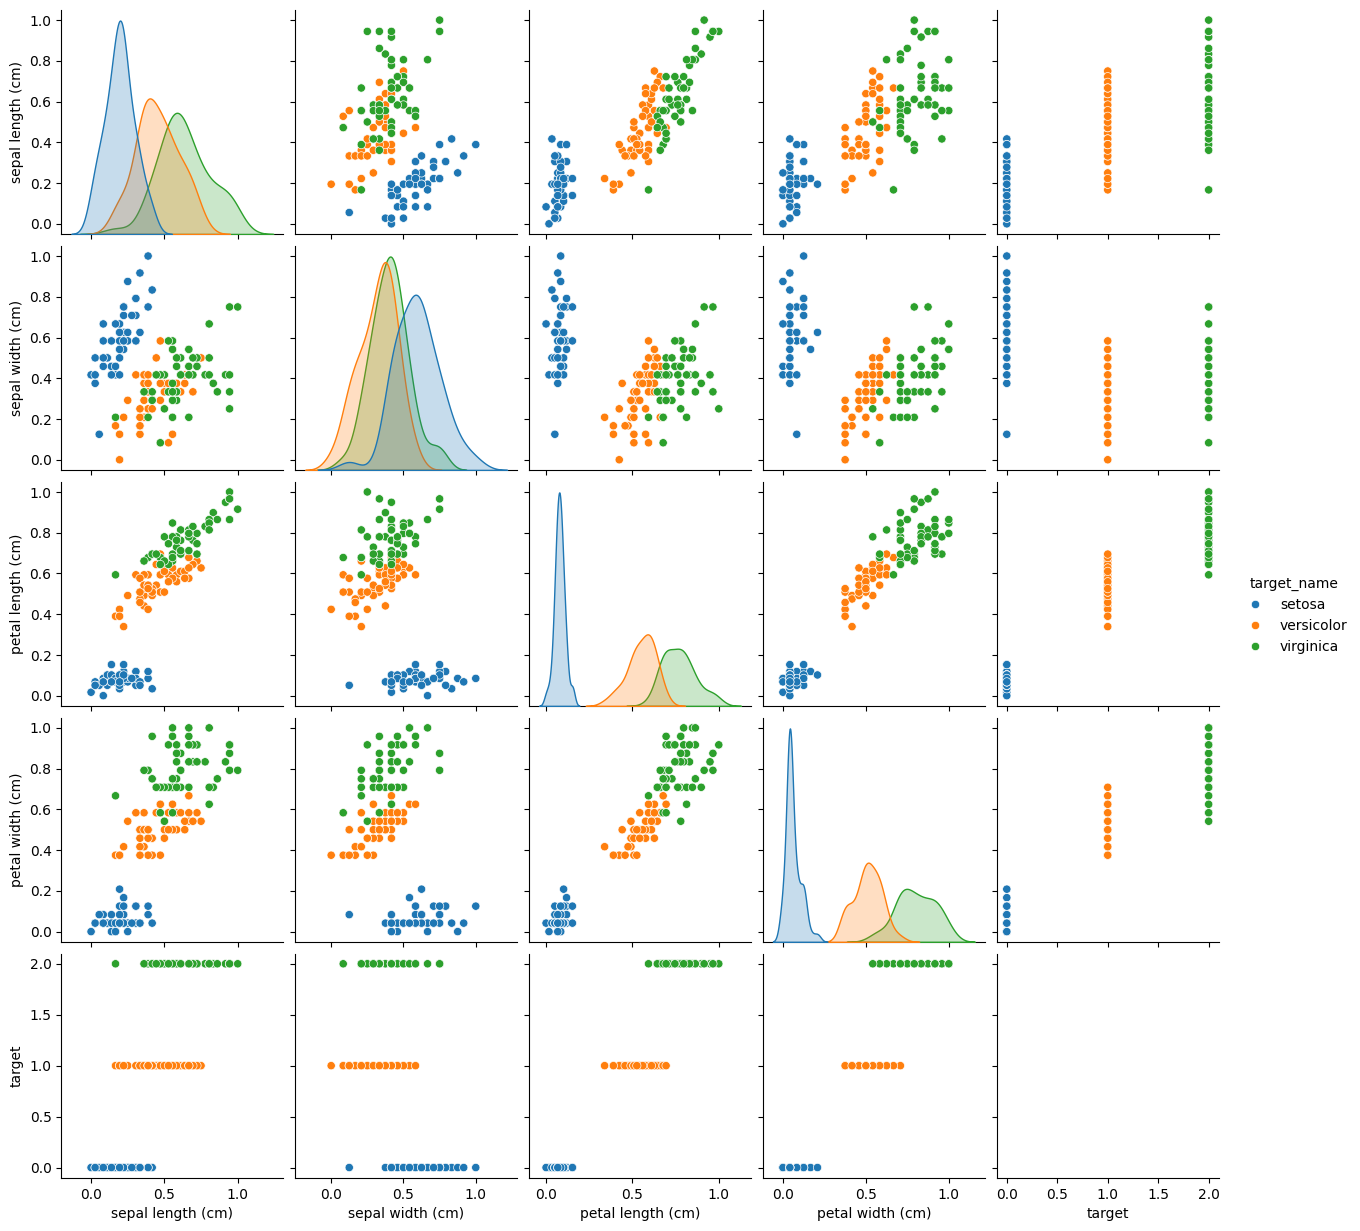

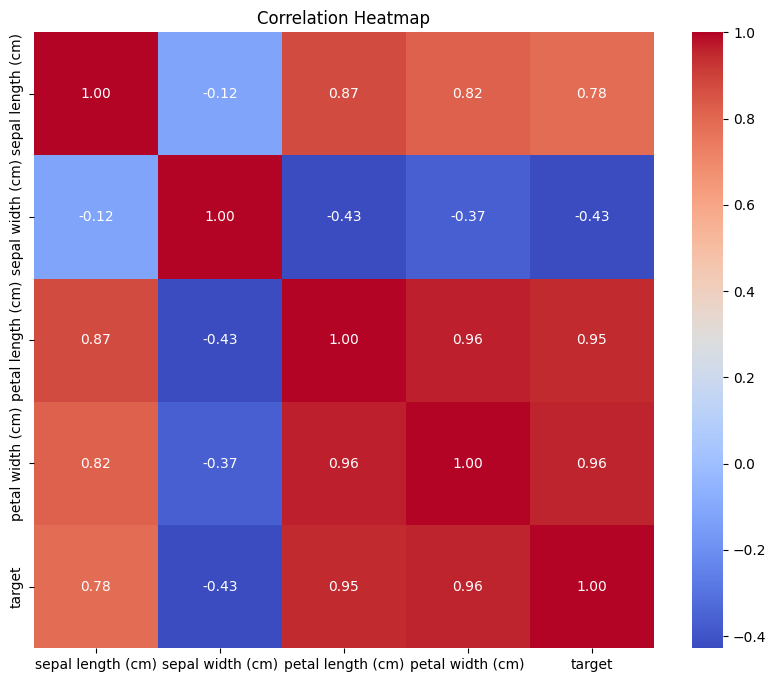

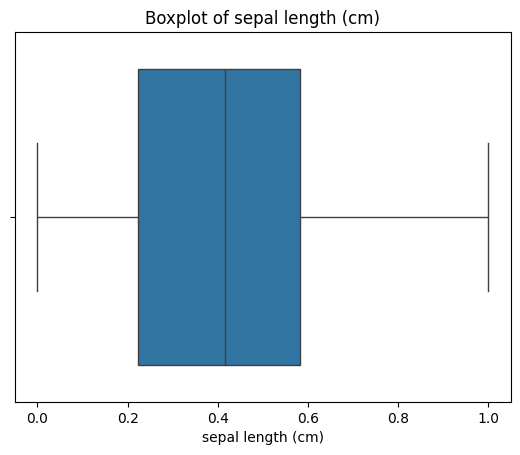

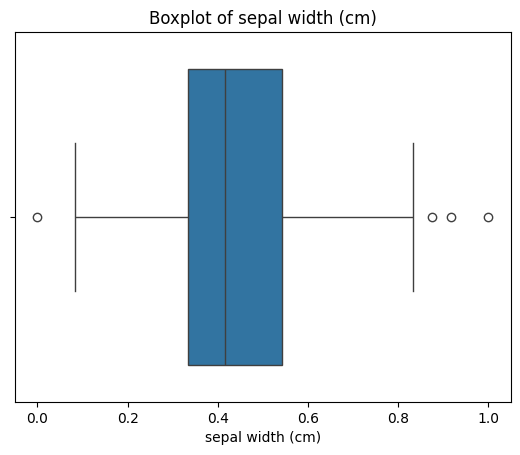

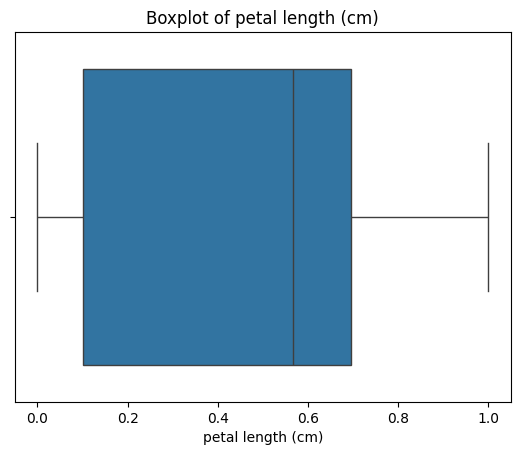

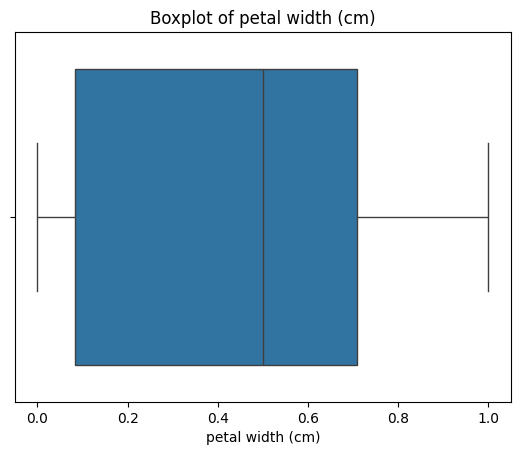

In [10]:
#compute basic statistics
print("\nBasic Statistics:")
print(df.describe())
#visualize feature distributions using seaborn and correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='target_name')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
#Identify any potential outliers using boxplots.
for column in df.columns[:-2]:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [11]:
#Write a function to split data into train/test (80/20).
from sklearn.model_selection import train_test_split
X = df[df.columns[:-2]]
y = df['target']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")




Training set shape: (120, 4), Test set shape: (30, 4)
